# Spotify Hit Prediction

#### Dataset description
<b>about the data</b>: This dataset include the song attribute such as danceability, energy, key and whether it is a popular song or not.
<b>target</b>: The target variable for the track. It can be either '0' or '1'. '1' implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' Implies that the track is a 'flop'.
</b>purpose</b>: purpose behind this analysis is choosing the most relevant attributes to create a model that could predict song popularity

#### Module

In [4]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

#### Combining CSV Files

In [5]:
os.chdir("/Users/Adinda Gita/Documents/Data Science/spotify/top_song")
    
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

#### Notebook Presentation

In [6]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

### Exploratory Data Analysis

#### Data Attributes

In [7]:
df= pd.read_csv("combined_csv.csv")

In [8]:
df.head(10)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.58,0.47,4,-7.27,1,0.03,0.37,0.00,0.16,0.53,133.06,196707,4,30.88,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.70,0.85,10,-5.48,0,0.18,0.02,0.00,0.15,0.69,92.99,242587,4,41.51,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.16,0.84,9,-3.01,1,0.05,0.00,0.00,0.17,0.30,86.96,338893,4,65.33,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.19,0.99,4,-3.75,1,0.17,0.00,0.08,0.19,0.33,148.44,255667,4,58.60,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.63,0.76,2,-4.35,1,0.03,0.36,0.00,0.12,0.63,112.10,193760,4,22.62,10,1
5,Dantzig Station,State Of Art,spotify:track:5Z3nrC0JbJmXaOGiXTuNFk,0.73,0.84,11,-7.22,0,0.10,0.37,0.27,0.14,0.97,135.35,192720,4,28.29,10,0
6,Divorced,Blacklisted,spotify:track:0iAdSLiQBIizTAiLUP7p5E,0.36,0.92,1,-2.64,1,0.07,0.00,0.00,0.32,0.29,77.25,89427,4,45.77,4,0
7,Where I Come From,Alan Jackson,spotify:track:6ej1QJ8eIYmhsyTlvgDajy,0.73,0.63,11,-8.14,0,0.03,0.22,0.00,0.19,0.75,124.71,239240,4,35.60,10,1
8,Nothin' To Die For,Tim McGraw,spotify:track:3lRSz6HujrSy9b3LXg2Kq9,0.48,0.79,10,-5.65,1,0.03,0.05,0.00,0.08,0.39,153.10,253640,4,19.66,11,1
9,I Want to Know Your Plans,Say Anything,spotify:track:3pjnCLIHbRczUjenWOEo56,0.65,0.32,7,-9.68,1,0.04,0.35,0.00,0.12,0.34,124.21,314286,3,32.66,16,0


In [9]:
df.dtypes

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object

In [10]:
df.shape

(82212, 19)

In [11]:
print(df.isna().sum())

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82212 entries, 0 to 82211
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             82212 non-null  object 
 1   artist            82212 non-null  object 
 2   uri               82212 non-null  object 
 3   danceability      82212 non-null  float64
 4   energy            82212 non-null  float64
 5   key               82212 non-null  int64  
 6   loudness          82212 non-null  float64
 7   mode              82212 non-null  int64  
 8   speechiness       82212 non-null  float64
 9   acousticness      82212 non-null  float64
 10  instrumentalness  82212 non-null  float64
 11  liveness          82212 non-null  float64
 12  valence           82212 non-null  float64
 13  tempo             82212 non-null  float64
 14  duration_ms       82212 non-null  int64  
 15  time_signature    82212 non-null  int64  
 16  chorus_hit        82212 non-null  float6

<AxesSubplot:xlabel='target'>

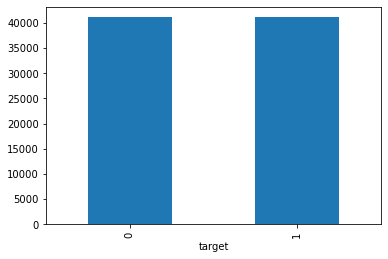

In [16]:
df_pie = df.groupby('target').size()
df_pie.plot.bar()

The amount of non-hit and hit songs are the same

In [30]:
df.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,1.00,0.21,0.02,0.27,-0.03,0.16,-0.26,-0.30,-0.12,0.55,-0.07,-0.06,0.19,-0.04,-0.06,0.35
energy,0.21,1.00,0.02,0.77,-0.03,0.12,-0.72,-0.21,0.16,0.34,0.22,0.01,0.20,0.01,-0.04,0.18
key,0.02,0.02,1.00,0.01,-0.14,0.03,-0.02,-0.01,0.00,0.01,0.00,0.02,0.00,0.01,0.01,0.01
loudness,0.27,0.77,0.01,1.00,0.00,0.07,-0.57,-0.37,0.09,0.27,0.17,-0.05,0.17,-0.01,-0.08,0.29
mode,-0.03,-0.03,-0.14,0.00,1.00,-0.06,0.05,-0.08,0.01,0.04,0.03,-0.07,-0.01,-0.02,-0.06,0.08
speechiness,0.16,0.12,0.03,0.07,-0.06,1.00,-0.08,-0.08,0.13,0.00,0.04,0.01,0.02,0.01,-0.01,-0.04
acousticness,-0.26,-0.72,-0.02,-0.57,0.05,-0.08,1.00,0.20,-0.03,-0.20,-0.18,-0.07,-0.19,-0.01,-0.02,-0.25
instrumentalness,-0.30,-0.21,-0.01,-0.37,-0.08,-0.08,0.20,1.00,-0.05,-0.29,-0.05,0.11,-0.08,0.05,0.08,-0.41
liveness,-0.12,0.16,0.00,0.09,0.01,0.13,-0.03,-0.05,1.00,0.00,0.02,0.01,0.00,0.04,-0.01,-0.05
valence,0.55,0.34,0.01,0.27,0.04,0.00,-0.20,-0.29,0.00,1.00,0.11,-0.17,0.16,-0.06,-0.13,0.25


#### Correlation
In order to choose which song attributes correlated the most with the event of a song being a hit, correlation diagram below is shown

In [31]:
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

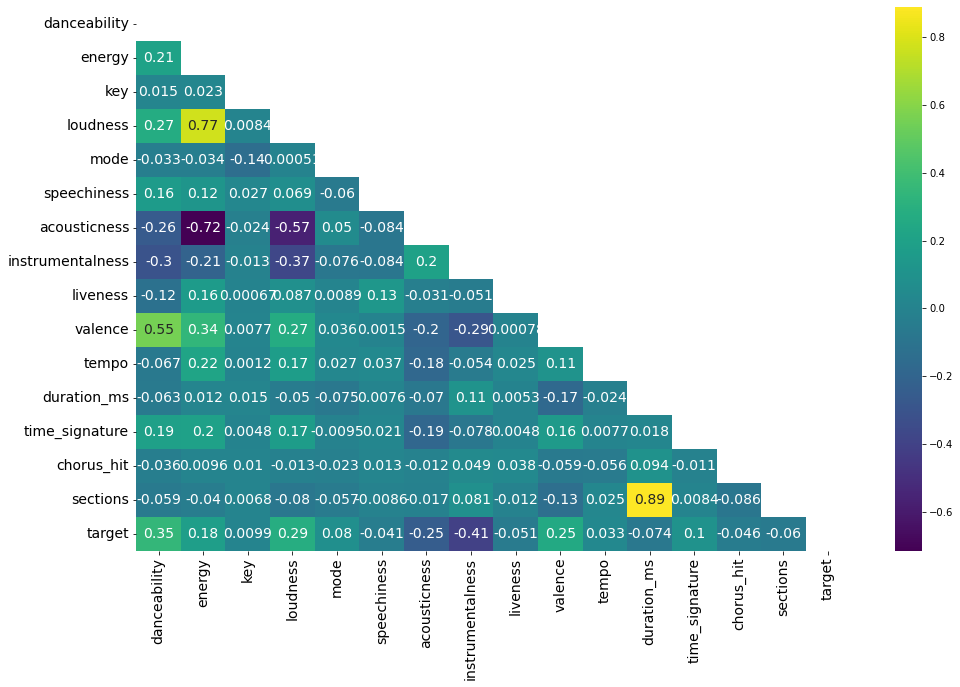

In [32]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),mask=mask, annot=True, cmap="viridis", annot_kws={"size": 14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [33]:
# %%time

# sns.pairplot(df)
# plt.show()

From the correlation diagram, 3 attributes chosen. The 3 attributes are danceability, loudness and valence

#### Danceability, Loudness and Valence has the highest positive correlation with target.
##### Below are the comparison of danceability, loudness and valence average between hit and non-hit songs 

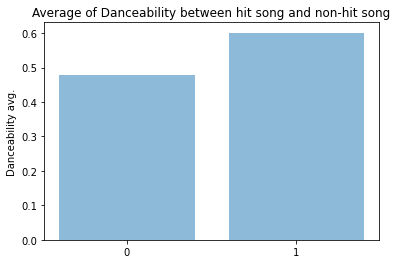

In [34]:
danceability = df.groupby('target')['danceability'].mean().reset_index(name='average')
danceability['target'].apply(str)
danceability.dtypes
plt.bar(danceability.target, danceability.average, align='center', alpha=0.5)
plt.xticks([0,1])
plt.ylabel('Danceability avg.')
plt.title('Average of Danceability between hit song and non-hit song')

plt.show()

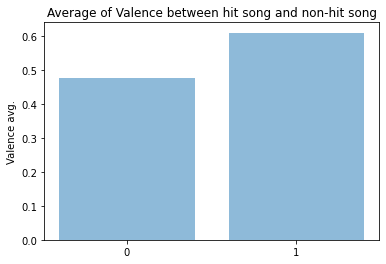

In [35]:
valence = df.groupby('target')['valence'].mean().reset_index(name='average')
plt.bar(valence.target, valence.average, align='center', alpha=0.5)
plt.xticks([0,1])
plt.ylabel('Valence avg.')
plt.title('Average of Valence between hit song and non-hit song')

plt.show()

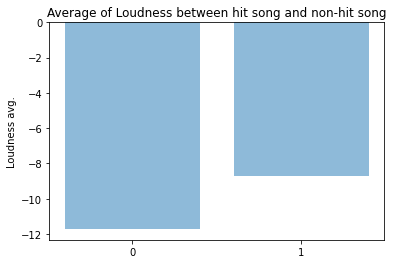

In [37]:
loudness = df.groupby('target')['loudness'].mean().reset_index(name='average')
plt.bar(loudness.target, loudness.average, align='center', alpha=0.5)
plt.xticks([0,1])
plt.ylabel('Loudness avg.')
plt.title('Average of Loudness between hit song and non-hit song')

plt.show()

The lesser the amount of negative in loudness means the louder the song. This might be due to adjustment of loudness by spotify, hence the quiter the song the bigger the minus.

### Modelling

#### Multilinear regression model with Loudness, Danceability and Valence.
Since the target is categorized as either '0' or '1', logistic regression is chosen as prediction model.

##### Detecting multicollinearity in variable chosen
High multicollinearity will affect the regression model. Hence below, the multicollinearity between chosen attributes are calculated. 

In [100]:
vif = pd.DataFrame()
vif["attribute"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [101]:
vif

,attribute,VIF
0,danceability,9.24
1,valence,7.26
2,loudness,2.82


The highest VIF is for danceability. It make sense since most of dance track is a "happy track" and loud enough to move around. However since the VIF still less than 10, it is acceptable.

#### Building Logistic Regression Model

In [112]:
X = df[['danceability', 'valence','loudness']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=0)

In [113]:
logreg = LogisticRegression()

In [114]:
clf = logreg.fit(X_train, y_train)

In [115]:
print(f"The coefficient for the logistic regression model are: {clf.coef_}") 
print(f"The intercept is: {clf.intercept_}")

The coefficient for the logistic regression model are: [[3.48608445 0.47601961 0.10734317]]
The intercept is: [-1.08743753]


***
$\mathbf{\text{Logistic Regression Model}}$<br>
***

$$p=\frac{exp (-1.087 + 0.486x + 0.476x + 0.107x)}{1 + exp (-1.087 + 0.486x + 0.476x + 0.107x)}$$

#### Predict test data using model

In [118]:
predictions = clf.predict(X_test[0:25])
y_prediction = y[0:25]

In [119]:
prediction_df = pd.DataFrame({'prediction':predictions, 'real data':y_prediction})
print('Comparison of prediction using model and real data')
print(prediction_df)
# df_compare = pd.DataFrame(prediction, y)
# print(df_compare)

Comparison of prediction using model and real data
    prediction  real data
0            1          1
1            0          1
2            1          0
3            1          0
4            1          1
5            0          0
6            0          0
7            0          1
8            0          1
9            1          0
10           1          1
11           1          1
12           0          0
13           1          1
14           0          0
15           0          0
16           0          1
17           0          1
18           0          0
19           0          0
20           0          1
21           1          0
22           1          0
23           1          1
24           1          0


In [110]:
score = logreg.score(test_X, test_y)
print(f"Score for this model is {score}")

Score for this model is 0.6703964972026271


### Confusion Matrix

In [130]:
all_predictions = logreg.predict(test_X)
cm = metrics.confusion_matrix(test_y, all_predictions)

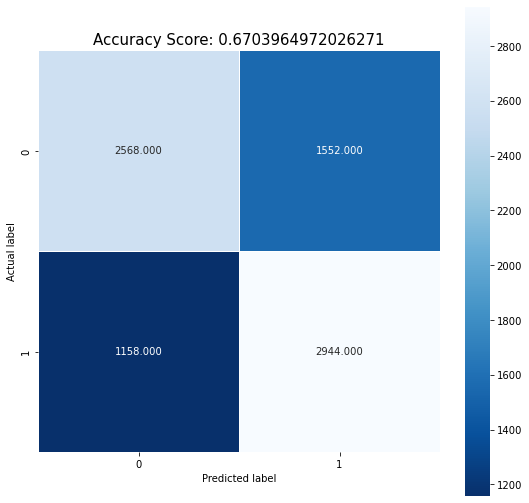

In [131]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);